In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings ('ignore')


In [121]:
df = pd.read_csv('train_data.csv')
df.shape

(54808, 14)

In [122]:
# basic inspection 
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [123]:
df['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [124]:
df.drop(columns='employee_id',inplace=True)

In [125]:
df.tail()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [127]:
# missing values 
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [128]:
# cat cols 
cat_cols = df.select_dtypes(include='object')
cat_cols

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [129]:
num_cols = df.select_dtypes(exclude='object').columns.to_list()
num_cols

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [220]:
# impute missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['education']] = imputer.fit_transform(df[['education']])


In [131]:
imputer = SimpleImputer(strategy='median')
df[['previous_year_rating']] = imputer.fit_transform(df[['previous_year_rating']])

In [132]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

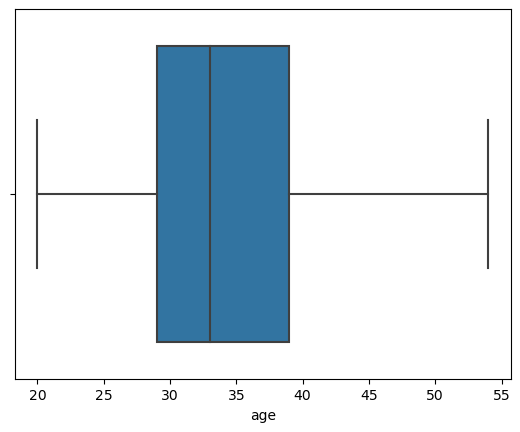

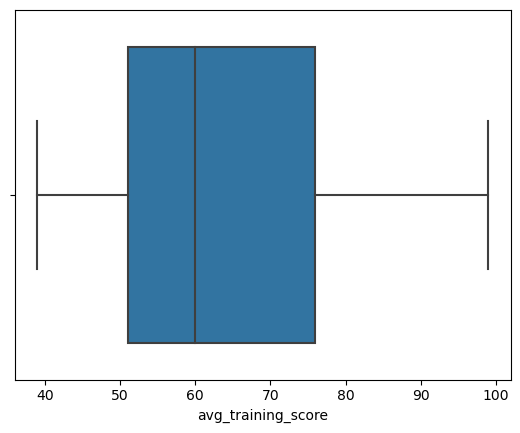

In [133]:
## outliers analysis and capping
num_columns = ['age','avg_training_score']
def outlier(col):
    
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = np.clip(df[col],lower_bound,upper_bound)

num_columns = ['age','avg_training_score']
for col in num_columns:
    outlier(col)
    sns.boxplot(x=df[col],orient='h')
    plt.show()

In [134]:
df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [141]:
cat_cols = cat_cols.columns.to_list()

In [142]:
# label encoder

from sklearn.preprocessing import LabelEncoder
df[cat_cols]=df[cat_cols].apply(LabelEncoder().fit_transform)


In [144]:
df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0


In [148]:
# Standardie the data 

from sklearn.preprocessing import StandardScaler
cols_to_standardize = df.columns[:-1]
scalar = StandardScaler()
scalar.fit(df[cols_to_standardize])

df[cols_to_standardize] = scalar.transform(df[cols_to_standardize])

In [152]:
df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,1.776526,1.619758,-1.536223,1.154111,-0.415276,0.038093,1.395766,0.500460,1.356878,-0.154018,-1.075931,0
1,-0.388183,-0.163034,-0.628838,0.650947,-0.885239,-0.415276,-0.636174,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0


# Apply PCA 

In [189]:
x = df.drop('is_promoted',axis=1)
y = df['is_promoted']



In [190]:
# import the package
from sklearn.decomposition import PCA
# save the package 
pca = PCA(n_components=10)
# fit the data
pca.fit(x)


PCA(n_components=10)

In [191]:
# transform the data 

pca_data = pca.transform(x)

In [192]:
# make a dataframe of pca

new_df = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [193]:
new_df['is_promoted'] = df['is_promoted']

In [194]:
new_df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,is_promoted
43122,-1.275164,1.536456,-0.723144,0.754738,-0.201145,-0.684651,-1.158958,-0.665983,-0.133588,0.199030,0
53073,-0.958543,-0.608797,0.072382,0.032916,-1.286701,-0.595772,0.832666,-1.202460,0.061504,1.086854,0
44021,4.247883,-1.485052,-0.454569,-1.012116,-0.020615,0.146991,1.445916,0.524088,0.183487,0.653922,0
15473,-0.844428,1.905911,0.964313,-1.920421,0.552347,-1.303399,-0.193493,-0.109165,0.735869,0.247014,0
46882,2.338192,-0.524023,-0.382629,0.279675,-1.227537,1.660163,-0.110204,0.067332,-0.305912,0.499896,0


In [195]:
pca.explained_variance_ratio_.sum()

0.9191640198809657

## train test split

In [196]:
x = new_df.drop(columns=['is_promoted'])
y = new_df['is_promoted']

In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# Train the model

### Random forest with hyper parameter

In [198]:
# import the package 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [169]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'], 
    'max_depth': [3, 5, 10],     
    'max_features': ['sqrt', 'log2'], 
    'random_state': [0, 42] 
}

In [199]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search = GridSearchCV(rf,  # Base model
                           param_grid, # params 
                           scoring='accuracy', # metrix
                           cv=5, # cross validation
                           verbose=True,
                           n_jobs=-1)

In [200]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [201]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [202]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 0}

In [203]:
grid_search.best_score_

0.920813787243936

In [204]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='gini',
                            max_depth=10,
                            max_features='sqrt',
                            n_estimators=200,
                            random_state = 0)
RF.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [209]:
y_pred = RF.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
acc = accuracy_score(y_test,y_pred)
acc

0.9241014413428207

In [216]:
precision = precision_score(y_test,y_pred)
precision

0.8114754098360656

In [217]:
recall = recall_score(y_test,y_pred)
recall

0.10903083700440529

In [218]:
f1 = f1_score(y_test,y_pred)
f1

0.19223300970873786

## use test data 

In [259]:
test_data = pd.read_csv('test_data.csv')
test_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [261]:
test_id = test_data['employee_id']

In [262]:
test_data.drop(columns=['employee_id'],inplace=True)

In [263]:
## check missing values 
test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [264]:
# impute missing values 
imputer = SimpleImputer(strategy='most_frequent')
test_data[['education']] = imputer.fit_transform(test_data[['education']])

In [265]:
imputer = SimpleImputer(strategy='median')
test_data[['previous_year_rating']] = imputer.fit_transform(test_data[['previous_year_rating']])

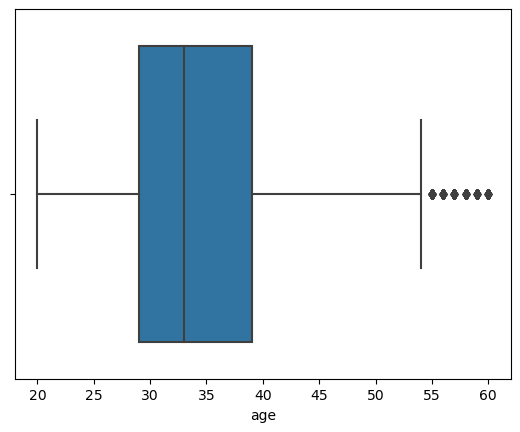

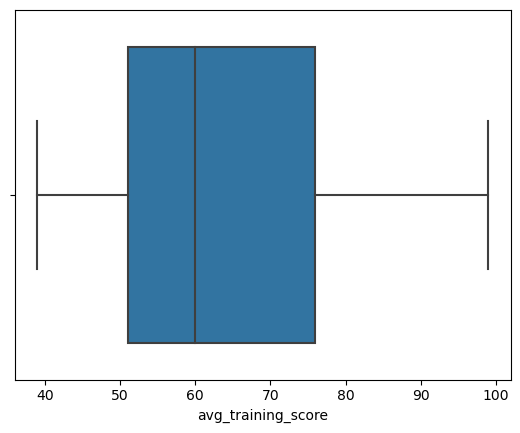

In [266]:
## outliers analysis and capping
num_columns = ['age','avg_training_score']
def outlier(col):
    
    q1 = np.percentile(test_data[col],25)
    q3 = np.percentile(test_data[col],75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = np.clip(df[col],lower_bound,upper_bound)

num_columns = test_data[['age','avg_training_score']]
for col in num_columns:
    outlier(col)
    sns.boxplot(x=test_data[col],orient='h')
    plt.show()

In [267]:
cat_col_test = test_data.select_dtypes(include='object').columns.to_list()

In [268]:
## label encoding 
test_data[cat_col_test]=test_data[cat_col_test].apply(LabelEncoder().fit_transform)

In [269]:
test_data.head(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.0,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61


In [270]:
# Standardie the data 

from sklearn.preprocessing import StandardScaler
cols_to_standardize = test_data.columns
scalar = StandardScaler()
scalar.fit(test_data[cols_to_standardize])

test_data[cols_to_standardize] = scalar.transform(test_data[cols_to_standardize])

In [271]:
test_data.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.206058,0.290490,-0.637366,0.644516,1.154134,-0.423094,-1.404150,-0.257191,-1.14320,1.336715,-0.152665,1.024263
1,-1.180154,1.436621,-0.637366,-1.551551,-0.883722,-0.423094,-0.492612,-0.257191,-0.19259,-0.748103,-0.152665,-0.914377


## apply pca 

In [272]:
# import the package
from sklearn.decomposition import PCA
# save the package 
pca = PCA(n_components=10)
# fit the data
pca.fit(test_data)

PCA(n_components=10)

In [273]:
pca_data_test = pca.transform(test_data)

In [274]:
# make a dataframe of pca

new_df_test = pd.DataFrame(pca_data_test,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [275]:
new_df_test.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.905481,0.193921,-0.735059,0.497830,-0.148573,-0.809482,0.577729,0.013344,-0.853888,1.907234
1,-0.730900,-0.366646,-0.110565,-1.307835,0.604867,-0.711829,-1.370244,0.275379,1.258937,-1.475155
2,-0.351880,-2.455717,-0.434785,-0.274617,0.159382,1.250093,-0.132006,-1.203231,-0.536143,0.003138


In [276]:
## pass this pca data to the model having best parameter

y_pred_test = RF.predict(new_df_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [277]:

y_pred_df = pd.DataFrame(y_pred_test, columns=['is_promoted'])
y_pred_df


,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [278]:
y_pred_df['employee_id'] = test_id

In [279]:
y_pred_df

,is_promoted,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486
...,...,...
23485,0,53478
23486,0,25600
23487,0,45409
23488,0,1186


In [283]:
column_c = y_pred_df.pop('is_promoted')

# Reinsert column 'C' at a new position
y_pred_df['is_promoted'] = column_c

In [284]:
y_pred_df

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [285]:
y_pred_df.to_csv("HR_PCA_Data.csv",index=False)